In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [253]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Линейная регрессия

Прогноз ретеншна на следующие 18 месяцев (линейная регрессия):
2023-09-30    0.146788
2023-10-31    0.104909
2023-11-30    0.063030
2023-12-31    0.021152
2024-01-31   -0.020727
2024-02-29   -0.062606
2024-03-31   -0.104485
2024-04-30   -0.146364
2024-05-31   -0.188242
2024-06-30   -0.230121
2024-07-31   -0.272000
2024-08-31   -0.313879
2024-09-30   -0.355758
2024-10-31   -0.397636
2024-11-30   -0.439515
2024-12-31   -0.481394
2025-01-31   -0.523273
2025-02-28   -0.565152
Freq: M, dtype: float64


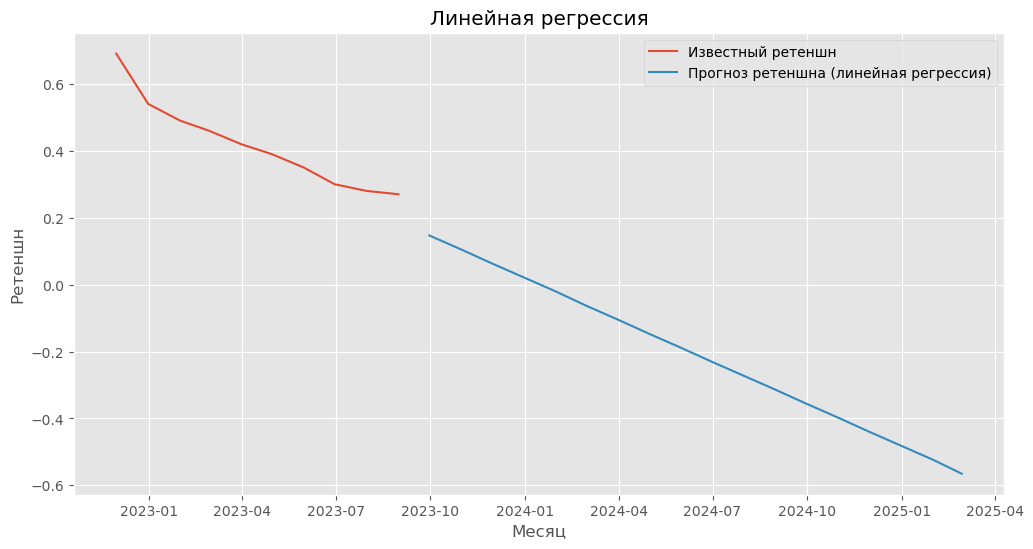

In [303]:
# Значения retention с ноября 2022 по август 2023
# retention_rates = [0.76, 0.61, 0.57, 0.54, 0.49, 0.45, 0.42, 0.40, 0.37, 0.36]
retention_rates = [0.69, 0.54, 0.49, 0.46, 0.42, 0.39, 0.35, 0.30, 0.28, 0.27]

# Создаем временные индексы для имеющихся данных
start_month = '2022-11'
end_month_known = '2023-09'
end_month_forecast = '2025-03'
date_range_known = pd.date_range(start=start_month, end=end_month_known, freq='M')
date_range_forecast = pd.date_range(start=end_month_known, end=end_month_forecast, freq='M')

# Создаем временной ряд с известными данными о retention
retention_series_linear = pd.Series(retention_rates, index=date_range_known)

# Прогноз на следующие 18 месяцев с линейной регрессией
from sklearn.linear_model import LinearRegression

# Создаем массив дней от начала наблюдений
days_since_start = np.arange(len(date_range_known)).reshape(-1, 1)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(days_since_start, retention_series_linear)

# Проводим прогноз на будущие месяцы
forecast_horizon = 18
forecast_days = len(date_range_known) + np.arange(1, forecast_horizon + 1).reshape(-1, 1)
forecast_retention = model.predict(forecast_days)

# Создаем временные индексы для прогноза
forecast_dates = date_range_forecast[:forecast_horizon]

# Создаем временной ряд с прогнозируемыми значениями ретеншна
forecast_series_linear = pd.Series(forecast_retention, index=forecast_dates)

# Выводим прогноз
print("Прогноз ретеншна на следующие 18 месяцев (линейная регрессия):")
print(forecast_series_linear)

# Визуализация
plt.plot(retention_series_linear.index, retention_series_linear.values, label='Известный ретеншн')
plt.plot(forecast_series_linear.index, forecast_series_linear.values, label='Прогноз ретеншна (линейная регрессия)')
plt.title('Линейная регрессия')
plt.xlabel('Месяц')
plt.ylabel('Ретеншн')
plt.legend()
plt.show()

# ARIMA model

Прогноз ретеншна на следующие 18 месяцев (ARIMA):
2023-09-30    0.246694
2023-10-31    0.226907
2023-11-30    0.210109
2023-12-31    0.195847
2024-01-31    0.183739
2024-02-29    0.173459
2024-03-31    0.164732
2024-04-30    0.157323
2024-05-31    0.151032
2024-06-30    0.145692
2024-07-31    0.141158
2024-08-31    0.137308
2024-09-30    0.134040
2024-10-31    0.131266
2024-11-30    0.128910
2024-12-31    0.126910
2025-01-31    0.125213
2025-02-28    0.123771
Freq: M, Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


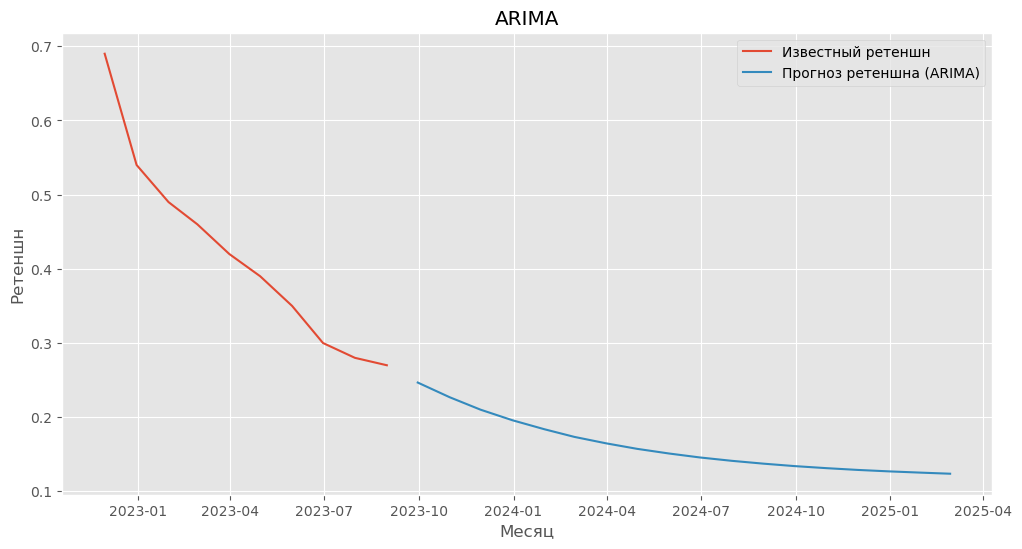

In [324]:
from statsmodels.tsa.arima.model import ARIMA

# Значения retention с ноября 2022 по август 2023
retention_rates = [0.69, 0.54, 0.49, 0.46, 0.42, 0.39, 0.35, 0.30, 0.28, 0.27]

# Создаем временные индексы для имеющихся данных
start_month = '2022-11'
end_month_known = '2023-09'
end_month_forecast = '2025-03'
date_range_known = pd.date_range(start=start_month, end=end_month_known, freq='M')
date_range_forecast = pd.date_range(start=end_month_known, end=end_month_forecast, freq='M')

# Создаем временной ряд с известными данными о ретеншне
retention_series_arima = pd.Series(retention_rates, index=date_range_known)

# Прогноз на следующие 18 месяцев с ARIMA моделью
p, d, q = 1, 1, 1  

# Создаем ARIMA модель и обучаем ее на известных данных
model = ARIMA(retention_series_arima, order=(p, d, q))
model_fit = model.fit()

# Делаем прогноз на следующие 6 месяцев
forecast_horizon = 24
forecast = model_fit.forecast(steps=forecast_horizon)

# Создаем временные индексы для прогноза
forecast_dates = date_range_forecast[:forecast_horizon]

# Создаем временной ряд с прогнозируемыми значениями ретеншна
forecast_series_arima = pd.Series(forecast, index=forecast_dates)

# Выводим прогноз
print("Прогноз ретеншна на следующие 18 месяцев (ARIMA):")
print(forecast_series_arima)


# Визуализация
plt.plot(retention_series_arima.index, retention_series_arima.values, label='Известный ретеншн')
plt.plot(forecast_series_arima.index, forecast_series_arima.values, label='Прогноз ретеншна (ARIMA)')
plt.title('ARIMA')
plt.xlabel('Месяц')
plt.ylabel('Ретеншн')
plt.legend()
plt.show()


# Полиноминальная регрессия

Прогноз ретеншна на следующие 18 месяцев (полиномиальная регрессия):
2023-09-30    0.146788
2023-10-31    0.104909
2023-11-30    0.063030
2023-12-31    0.021152
2024-01-31   -0.020727
2024-02-29   -0.062606
2024-03-31   -0.104485
2024-04-30   -0.146364
2024-05-31   -0.188242
2024-06-30   -0.230121
2024-07-31   -0.272000
2024-08-31   -0.313879
2024-09-30   -0.355758
2024-10-31   -0.397636
2024-11-30   -0.439515
2024-12-31   -0.481394
2025-01-31   -0.523273
2025-02-28   -0.565152
Freq: M, dtype: float64


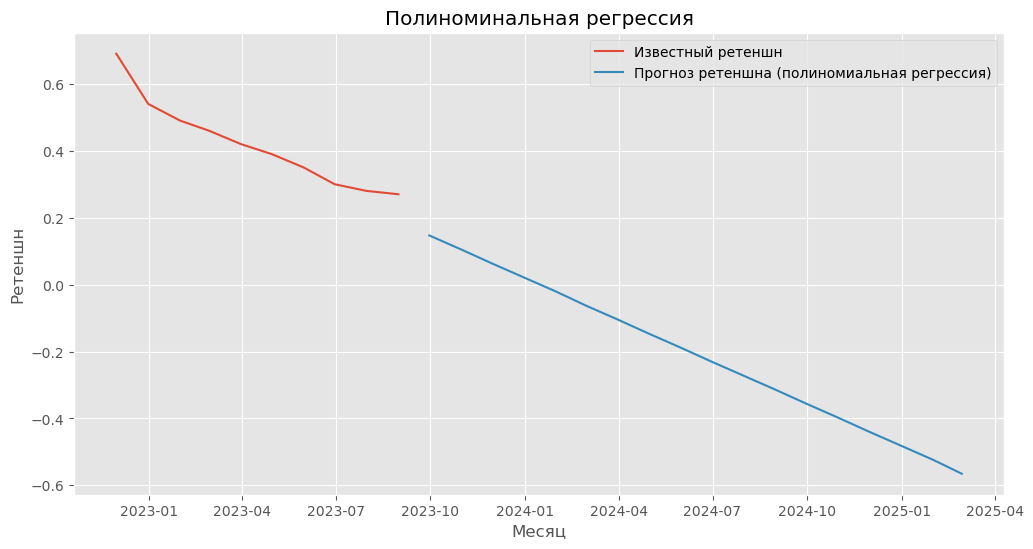

In [305]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Значения retention с ноября 2022 по август 2023
retention_rates = [0.69, 0.54, 0.49, 0.46, 0.42, 0.39, 0.35, 0.30, 0.28, 0.27]

# Создаем временные индексы для имеющихся данных
start_month = '2022-11'
end_month_known = '2023-09'
end_month_forecast = '2025-03'
date_range_known = pd.date_range(start=start_month, end=end_month_known, freq='M')
date_range_forecast = pd.date_range(start=end_month_known, end=end_month_forecast, freq='M')

# Создаем временной ряд с известными данными о retention
retention_series_poly = pd.Series(retention_rates, index=date_range_known)

# Прогноз на следующие 18 месяцев с полиномиальной регрессией
forecast_horizon = 18

# Создаем массив дней от начала наблюдений
days_since_start = np.arange(len(date_range_known)).reshape(-1, 1)

# Преобразуем признаки в полиномиальные признаки
poly = PolynomialFeatures(degree=1)  # Вы можете настроить степень полинома
X_poly = poly.fit_transform(days_since_start)

# Создаем и обучаем модель полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_poly, retention_series_poly)

# Проводим прогноз на будущие месяцы
forecast_days = len(date_range_known) + np.arange(1, forecast_horizon + 1).reshape(-1, 1)
forecast_retention = poly_reg.predict(poly.fit_transform(forecast_days))

# Создаем временные индексы для прогноза
forecast_dates = date_range_forecast[:forecast_horizon]

# Создаем временной ряд с прогнозируемыми значениями ретеншна
forecast_series_poly = pd.Series(forecast_retention, index=forecast_dates)

# Выводим прогноз
print("Прогноз ретеншна на следующие 18 месяцев (полиномиальная регрессия):")
print(forecast_series_poly)


# Визуализация
plt.plot(retention_series_poly.index, retention_series_poly.values, label='Известный ретеншн')
plt.plot(forecast_series_poly.index, forecast_series_poly.values, label='Прогноз ретеншна (полиномиальная регрессия)')
plt.title('Полиноминальная регрессия')
plt.xlabel('Месяц')
plt.ylabel('Ретеншн')
plt.legend()
plt.show()


# Экстраполяции на основе тренда

Прогноз ретеншна на следующие 18 месяцев (экстраполяция):
2023-09-30    0.228
2023-10-31    0.186
2023-11-30    0.144
2023-12-31    0.102
2024-01-31    0.060
2024-02-29    0.018
2024-03-31   -0.024
2024-04-30   -0.066
2024-05-31   -0.108
2024-06-30   -0.150
2024-07-31   -0.192
2024-08-31   -0.234
2024-09-30   -0.276
2024-10-31   -0.318
2024-11-30   -0.360
2024-12-31   -0.402
2025-01-31   -0.444
2025-02-28   -0.486
Freq: M, dtype: float64


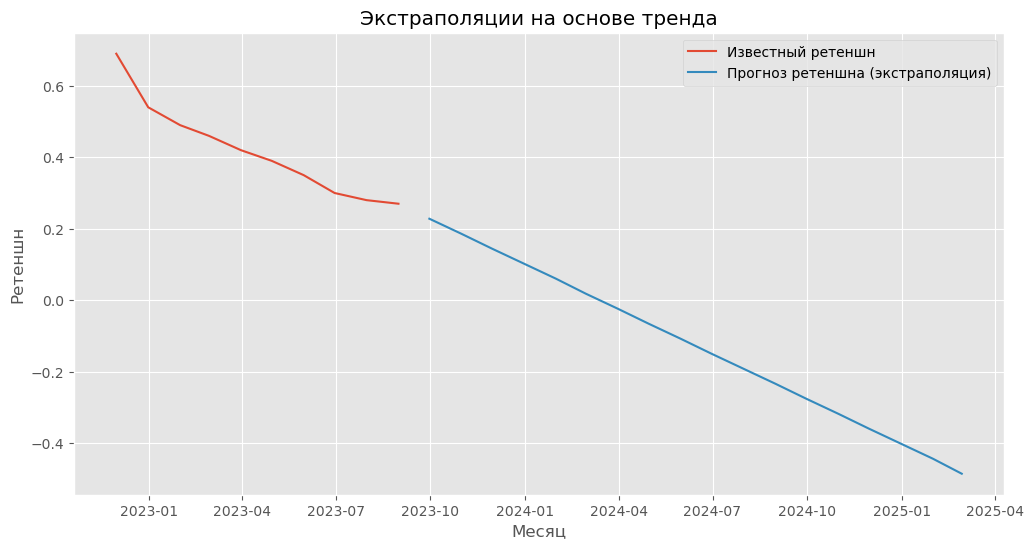

In [306]:
# Значения retention с ноября 2022 по август 2023
retention_rates = [0.69, 0.54, 0.49, 0.46, 0.42, 0.39, 0.35, 0.30, 0.28, 0.27]

# Создаем временные индексы для имеющихся данных
start_month = '2022-11'
end_month_known = '2023-09'
end_month_forecast = '2025-03'
date_range_known = pd.date_range(start=start_month, end=end_month_known, freq='M')
date_range_forecast = pd.date_range(start=end_month_known, end=end_month_forecast, freq='M')

# Создаем временной ряд с известными данными о retention
retention_series_trend = pd.Series(retention_rates, index=date_range_known)

# Определяем тренд
trend = (retention_series_trend.iloc[-1] - retention_series_trend.iloc[0]) / len(retention_series_trend)

# Продолжаем тренд
forecast_horizon = 18
forecast = [retention_series_trend.iloc[-1] + i * trend for i in range(1, forecast_horizon + 1)]

# Создаем временные индексы для прогноза
forecast_dates = date_range_forecast

# Создаем временной ряд с прогнозируемыми значениями ретеншна
forecast_series_trend = pd.Series(forecast, index=forecast_dates)


# Визуализация
print("Прогноз ретеншна на следующие 18 месяцев (экстраполяция):")
print(forecast_series_trend)

plt.plot(retention_series_trend.index, retention_series_trend.values, label='Известный ретеншн')
plt.plot(forecast_series_trend.index, forecast_series_trend.values, label='Прогноз ретеншна (экстраполяция)')
plt.title('Экстраполяции на основе тренда')
plt.xlabel('Месяц')
plt.ylabel('Ретеншн')
plt.legend()
plt.show()


# Общая визуализация

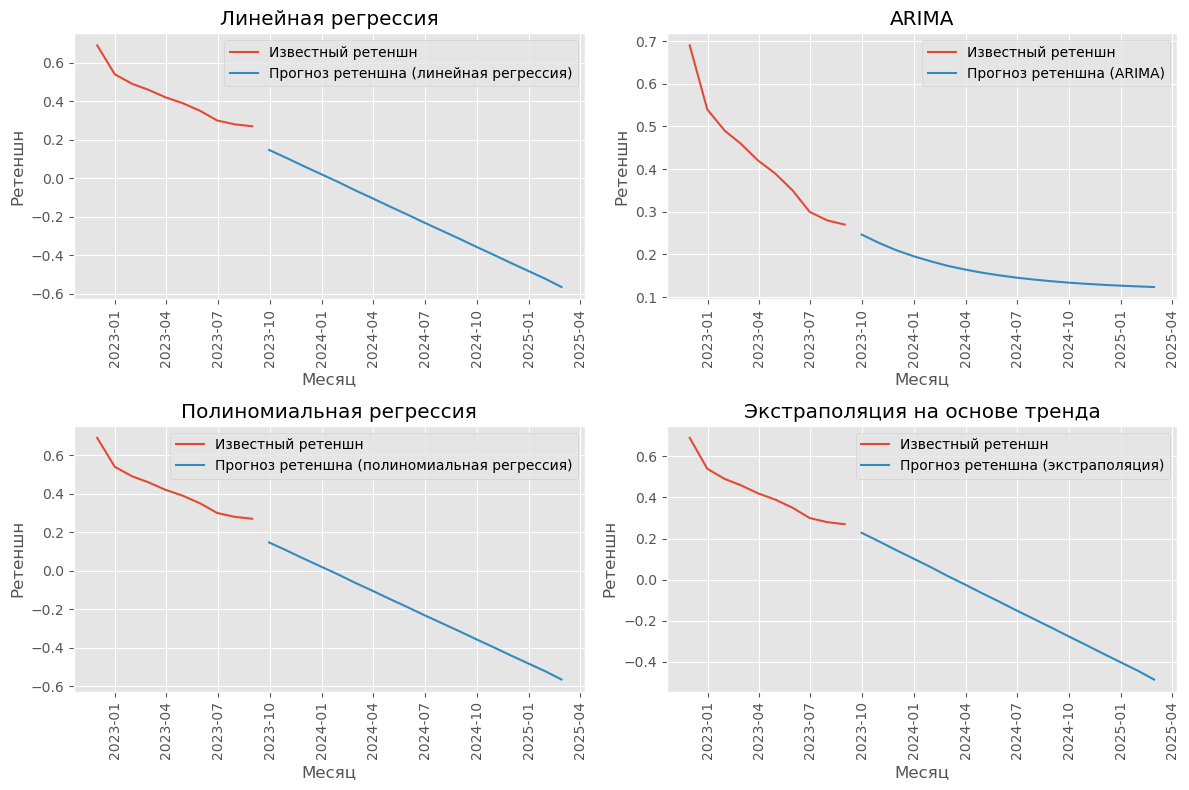

In [307]:
# Создаем фигуру и оси с сабплотами
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Линейная регрессия
axs[0, 0].plot(retention_series_linear.index, retention_series_linear.values, label='Известный ретеншн')
axs[0, 0].plot(forecast_series_linear.index, forecast_series_linear.values, label='Прогноз ретеншна (линейная регрессия)')
axs[0, 0].set_title('Линейная регрессия')
axs[0, 0].set_xlabel('Месяц')
axs[0, 0].set_ylabel('Ретеншн')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].legend()

# ARIMA
axs[0, 1].plot(retention_series_arima.index, retention_series_arima.values, label='Известный ретеншн')
axs[0, 1].plot(forecast_series_arima.index, forecast_series_arima.values, label='Прогноз ретеншна (ARIMA)')
axs[0, 1].set_title('ARIMA')
axs[0, 1].set_xlabel('Месяц')
axs[0, 1].set_ylabel('Ретеншн')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].legend()

# Полиномиальная регрессия
axs[1, 0].plot(retention_series_poly.index, retention_series_poly.values, label='Известный ретеншн')
axs[1, 0].plot(forecast_series_poly.index, forecast_series_poly.values, label='Прогноз ретеншна (полиномиальная регрессия)')
axs[1, 0].set_title('Полиномиальная регрессия')
axs[1, 0].set_xlabel('Месяц')
axs[1, 0].set_ylabel('Ретеншн')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].legend()

# Экстраполяция на основе тренда
axs[1, 1].plot(retention_series_trend.index, retention_series_trend.values, label='Известный ретеншн')
axs[1, 1].plot(forecast_series_trend.index, forecast_series_trend.values, label='Прогноз ретеншна (экстраполяция)')
axs[1, 1].set_title('Экстраполяция на основе тренда')
axs[1, 1].set_xlabel('Месяц')
axs[1, 1].set_ylabel('Ретеншн')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].legend()


# Размещение сабплотов с автоматическим выравниванием
plt.tight_layout()
plt.show()


### Мы видим, что модель ARIMA наиболее точно предсказала ретеншн, ее результаты мы и будем использовать

# На основе данныx о retention предскажем ROI на ближайшие 1,5 года

В октябре 2022 мы потратили на рекламу $11000, с этой рекламы подписку купили 115 новых юзеров (первая покупка). 
Средний чек — $12. 
Подписка помесячная и списывается каждый месяц. Мы знаем retention в оплату каждого последующего месяца с первого месяца (месяца покупки подписки). 
Давайте выясним, когда окупятся наши вложения в рекламу по этой когорте.

In [308]:
# Преобразуем предсказание retention по ARIMA в датафрейм
df = pd.DataFrame(forecast_series_arima)

In [309]:
df

,predicted_mean
2023-09-30,0.246694
2023-10-31,0.226907
2023-11-30,0.210109
2023-12-31,0.195847
2024-01-31,0.183739
2024-02-29,0.173459
2024-03-31,0.164732
2024-04-30,0.157323
2024-05-31,0.151032
2024-06-30,0.145692


In [321]:
# Создаем колонку income — доход, которая считает потенциальный доход на основании retention в покупку, 
#  колическтва клиентов, пришедших с рекламы в октябре 2022 года и среднего чека
df['income'] = df['predicted_mean']*115*12

# С октября 2022 года по август 2022 года когорта клиентов с октября 2022 года принесла нам $9000
# Создаем колонку ROI
# Формула расчета ROI: (доход от вложений — размер вложений) / размер вложений * 100%
df['ROI'] = (7162 + df['income'].cumsum())/11000*100

In [322]:
df

,predicted_mean,income,ROI
2023-09-30,0.246694,340.437570,68.203978
2023-10-31,0.226907,313.132063,71.050633
2023-11-30,0.210109,289.950025,73.686542
2023-12-31,0.195847,270.268759,76.143531
2024-01-31,0.183739,253.559608,78.448618
2024-02-29,0.173459,239.373744,80.624743
2024-03-31,0.164732,227.330120,82.691381
2024-04-30,0.157323,217.105232,84.665065
2024-05-31,0.151032,208.424428,86.559832
2024-06-30,0.145692,201.054533,88.387601


### Мы видим, что только через 2.5 года мы окупим рекламные вложения в когорту клиентов, пришедших в октябре 2022